# Mobile robot detection with YOLOv5

## Setup

In [1]:
import gc
import torch
from IPython.display import Image, clear_output

device_properties = torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'
print(f'Setup complete. Using torch {torch.__version__} with {device_properties}')

Setup complete. Using torch 1.6.0 with _CudaDeviceProperties(name='GeForce GTX 1050 Ti', major=6, minor=1, total_memory=4040MB, multi_processor_count=6)


## Training

In [2]:
!rm -rf runs/train/trashy

In [3]:
gc.collect()
torch.cuda.empty_cache()

In [4]:
%load_ext tensorboard
%tensorboard --logdir runs

Reusing TensorBoard on port 6006 (pid 20760), started 0:49:50 ago. (Use '!kill 20760' to kill it.)

In [5]:
!python yolov5/train.py \
    --img 400 \
    --batch 16 \
    --epochs 100 \
    --data data/trashy_v2-yolov5pytorch/data.yaml \
    --weights yolov5s.pt \
    --name trashy \
    --adam

Using torch 1.6.0 CUDA:0 (GeForce GTX 1050 Ti, 4040MB)

Namespace(adam=True, batch_size=16, bucket='', cache_images=False, cfg='', data='data/trashy_v2-yolov5pytorch/data.yaml', device='', epochs=100, evolve=False, exist_ok=False, global_rank=-1, hyp='./yolov5/data/hyp.scratch.yaml', image_weights=False, img_size=[400, 400], local_rank=-1, log_imgs=16, multi_scale=False, name='trashy', noautoanchor=False, nosave=False, notest=False, project='runs/train', rect=False, resume=False, save_dir='runs/train/trashy', single_cls=False, sync_bn=False, total_batch_size=16, weights='yolov5s.pt', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
Hyperparameters {'lr0': 0.01, 'lrf': 0.2, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'warmup_bias_lr': 0.1, 'box': 0.05, 'cls': 0.5, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.015, 'hsv_s': 0


     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
      8/99      1.5G    0.0602   0.03963         0   0.09983         1       416
               Class      Images     Targets           P           R      mAP@.5
                 all          12          12           0           0       0.287      0.0807

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
      9/99      1.5G   0.06477   0.02787         0   0.09264         1       416
               Class      Images     Targets           P           R      mAP@.5
                 all          12          12           0           0       0.168      0.0378

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
     10/99      1.5G   0.05934   0.02589         0   0.08523         1       416
               Class      Images     Targets           P           R      mAP@.5
                 all          12          12       0.334      0.0833       0.296  

               Class      Images     Targets           P           R      mAP@.5
                 all          12          12       0.325           1       0.995       0.676

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
     57/99      1.5G   0.03074   0.01217         0   0.04291         1       416
               Class      Images     Targets           P           R      mAP@.5
                 all          12          12       0.315           1       0.995       0.657

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
     58/99      1.5G   0.03101    0.0189         0   0.04992         4       416
               Class      Images     Targets           P           R      mAP@.5
                 all          12          12       0.284           1       0.995       0.674

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
     59/99      1.5G   0.03354   0.01405         0   0.04759         2


     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
     81/99      1.5G   0.02493   0.01415         0   0.03908         4       416
               Class      Images     Targets           P           R      mAP@.5
                 all          12          12       0.786           1       0.995       0.789

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
     82/99      1.5G   0.01941   0.01046         0   0.02986         0       416
               Class      Images     Targets           P           R      mAP@.5
                 all          12          12       0.691           1       0.995       0.716

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
     83/99      1.5G   0.02204   0.01319         0   0.03523         4       416
               Class      Images     Targets           P           R      mAP@.5
                 all          12          12       0.672           1       0.995  

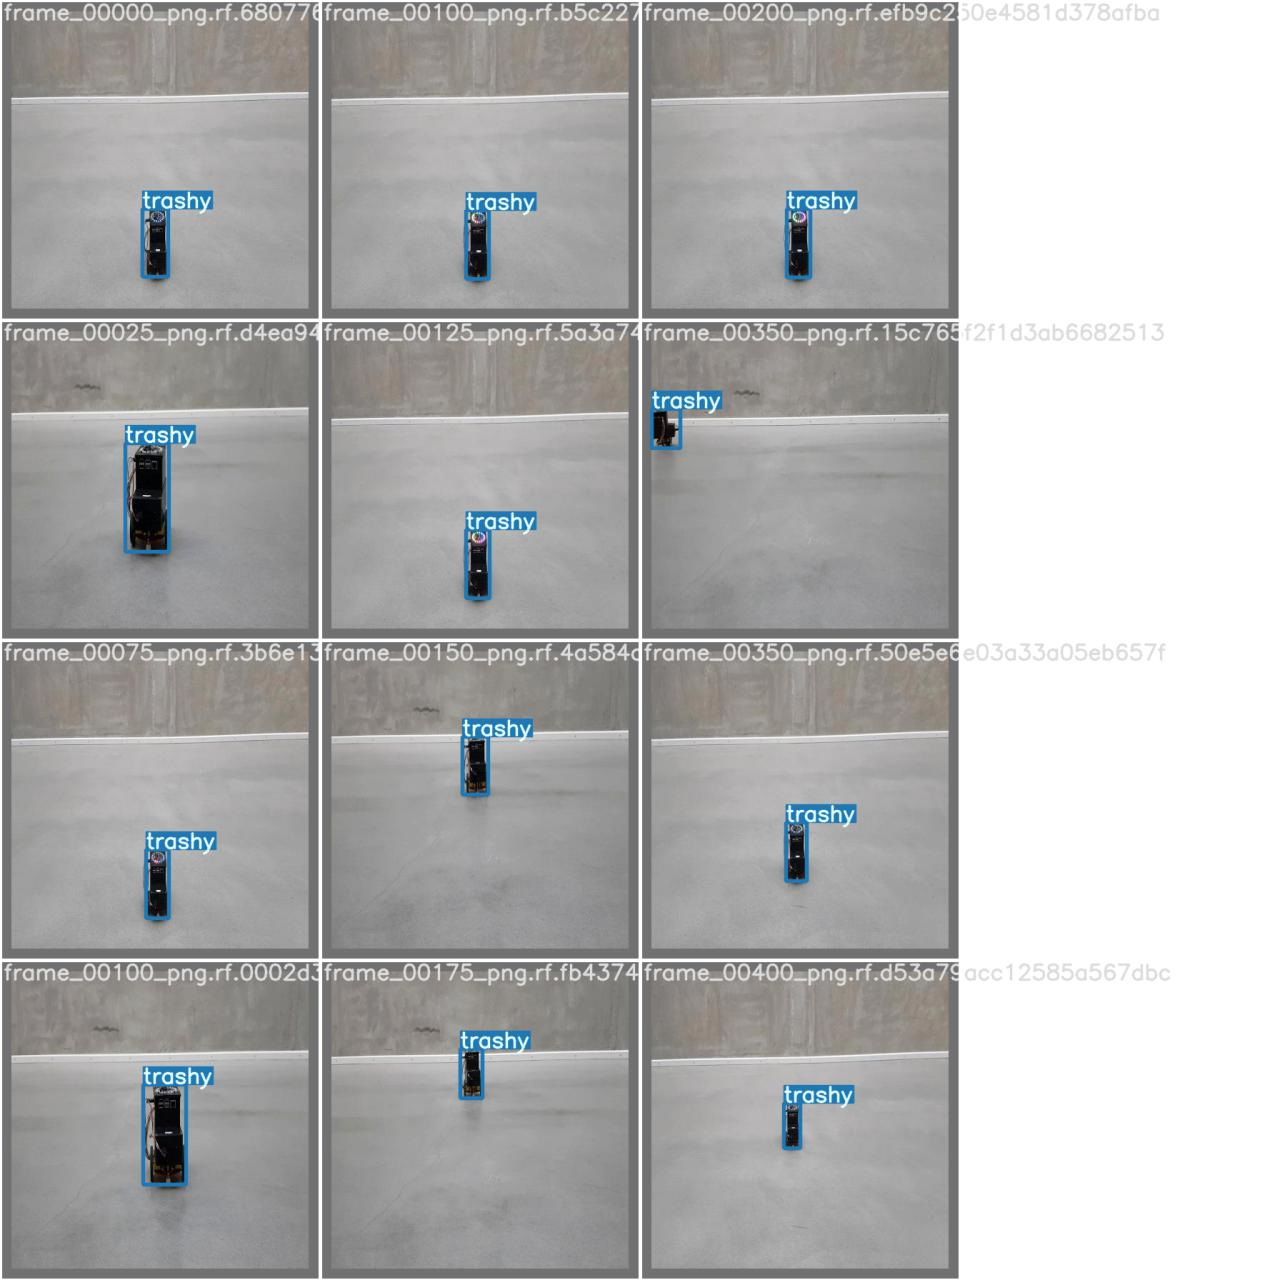

In [6]:
Image(filename='runs/train/trashy/test_batch0_labels.jpg', width=800)

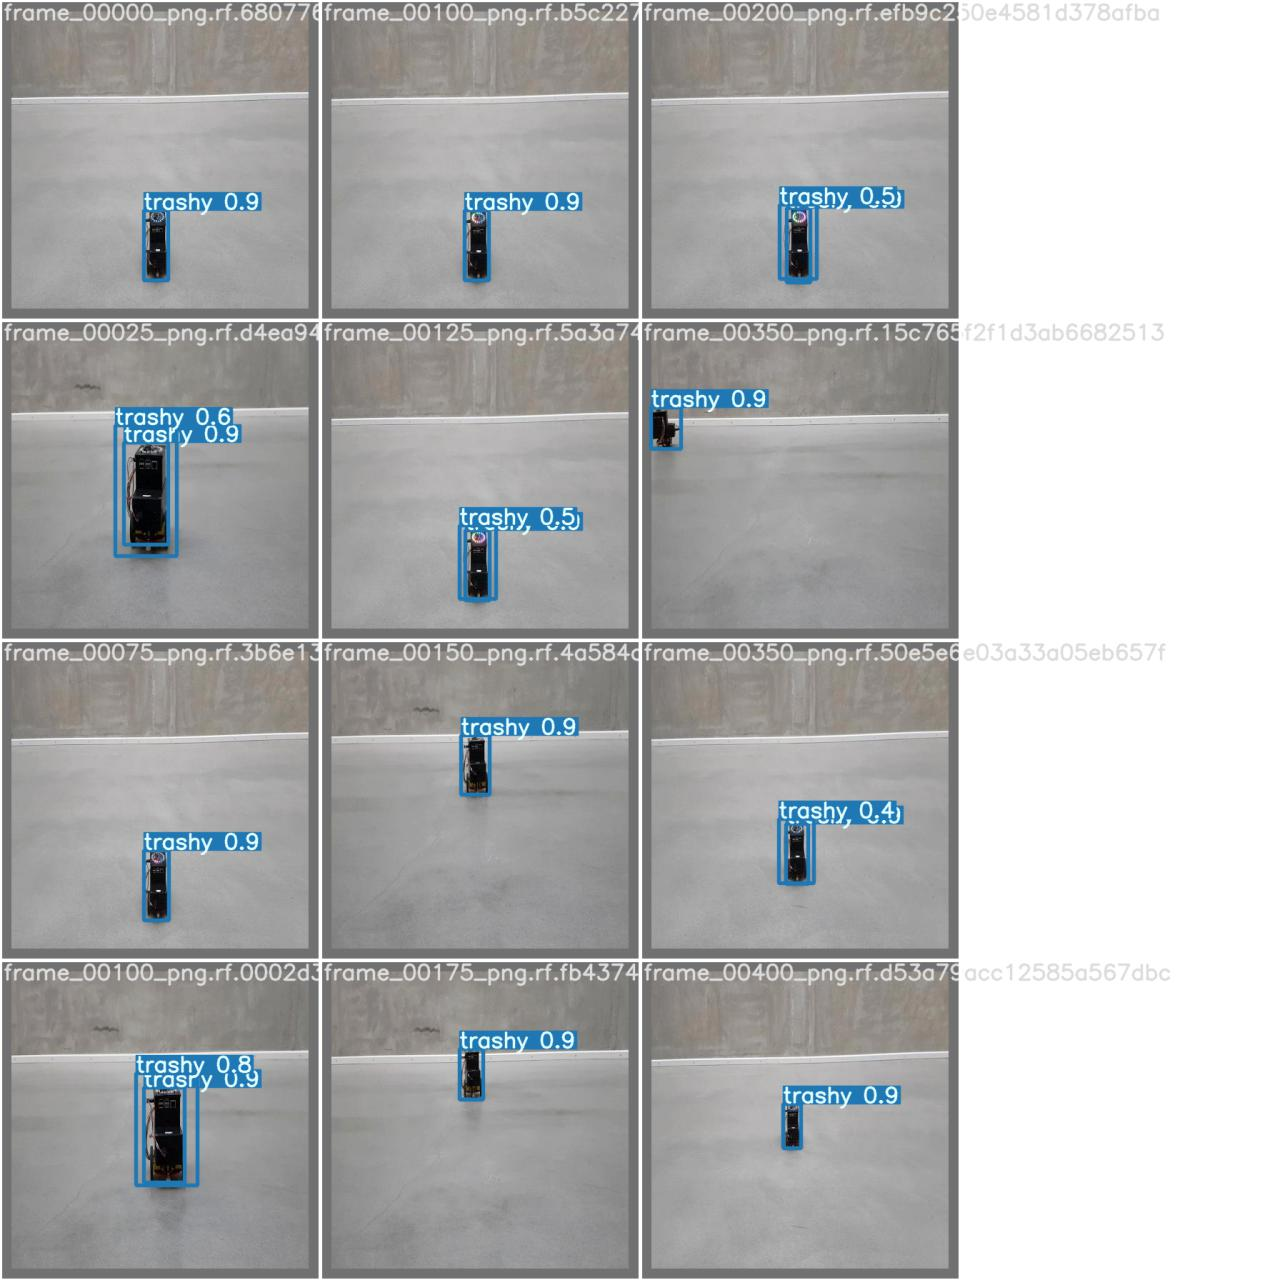

In [7]:
Image(filename='runs/train/trashy/test_batch0_pred.jpg', width=800)

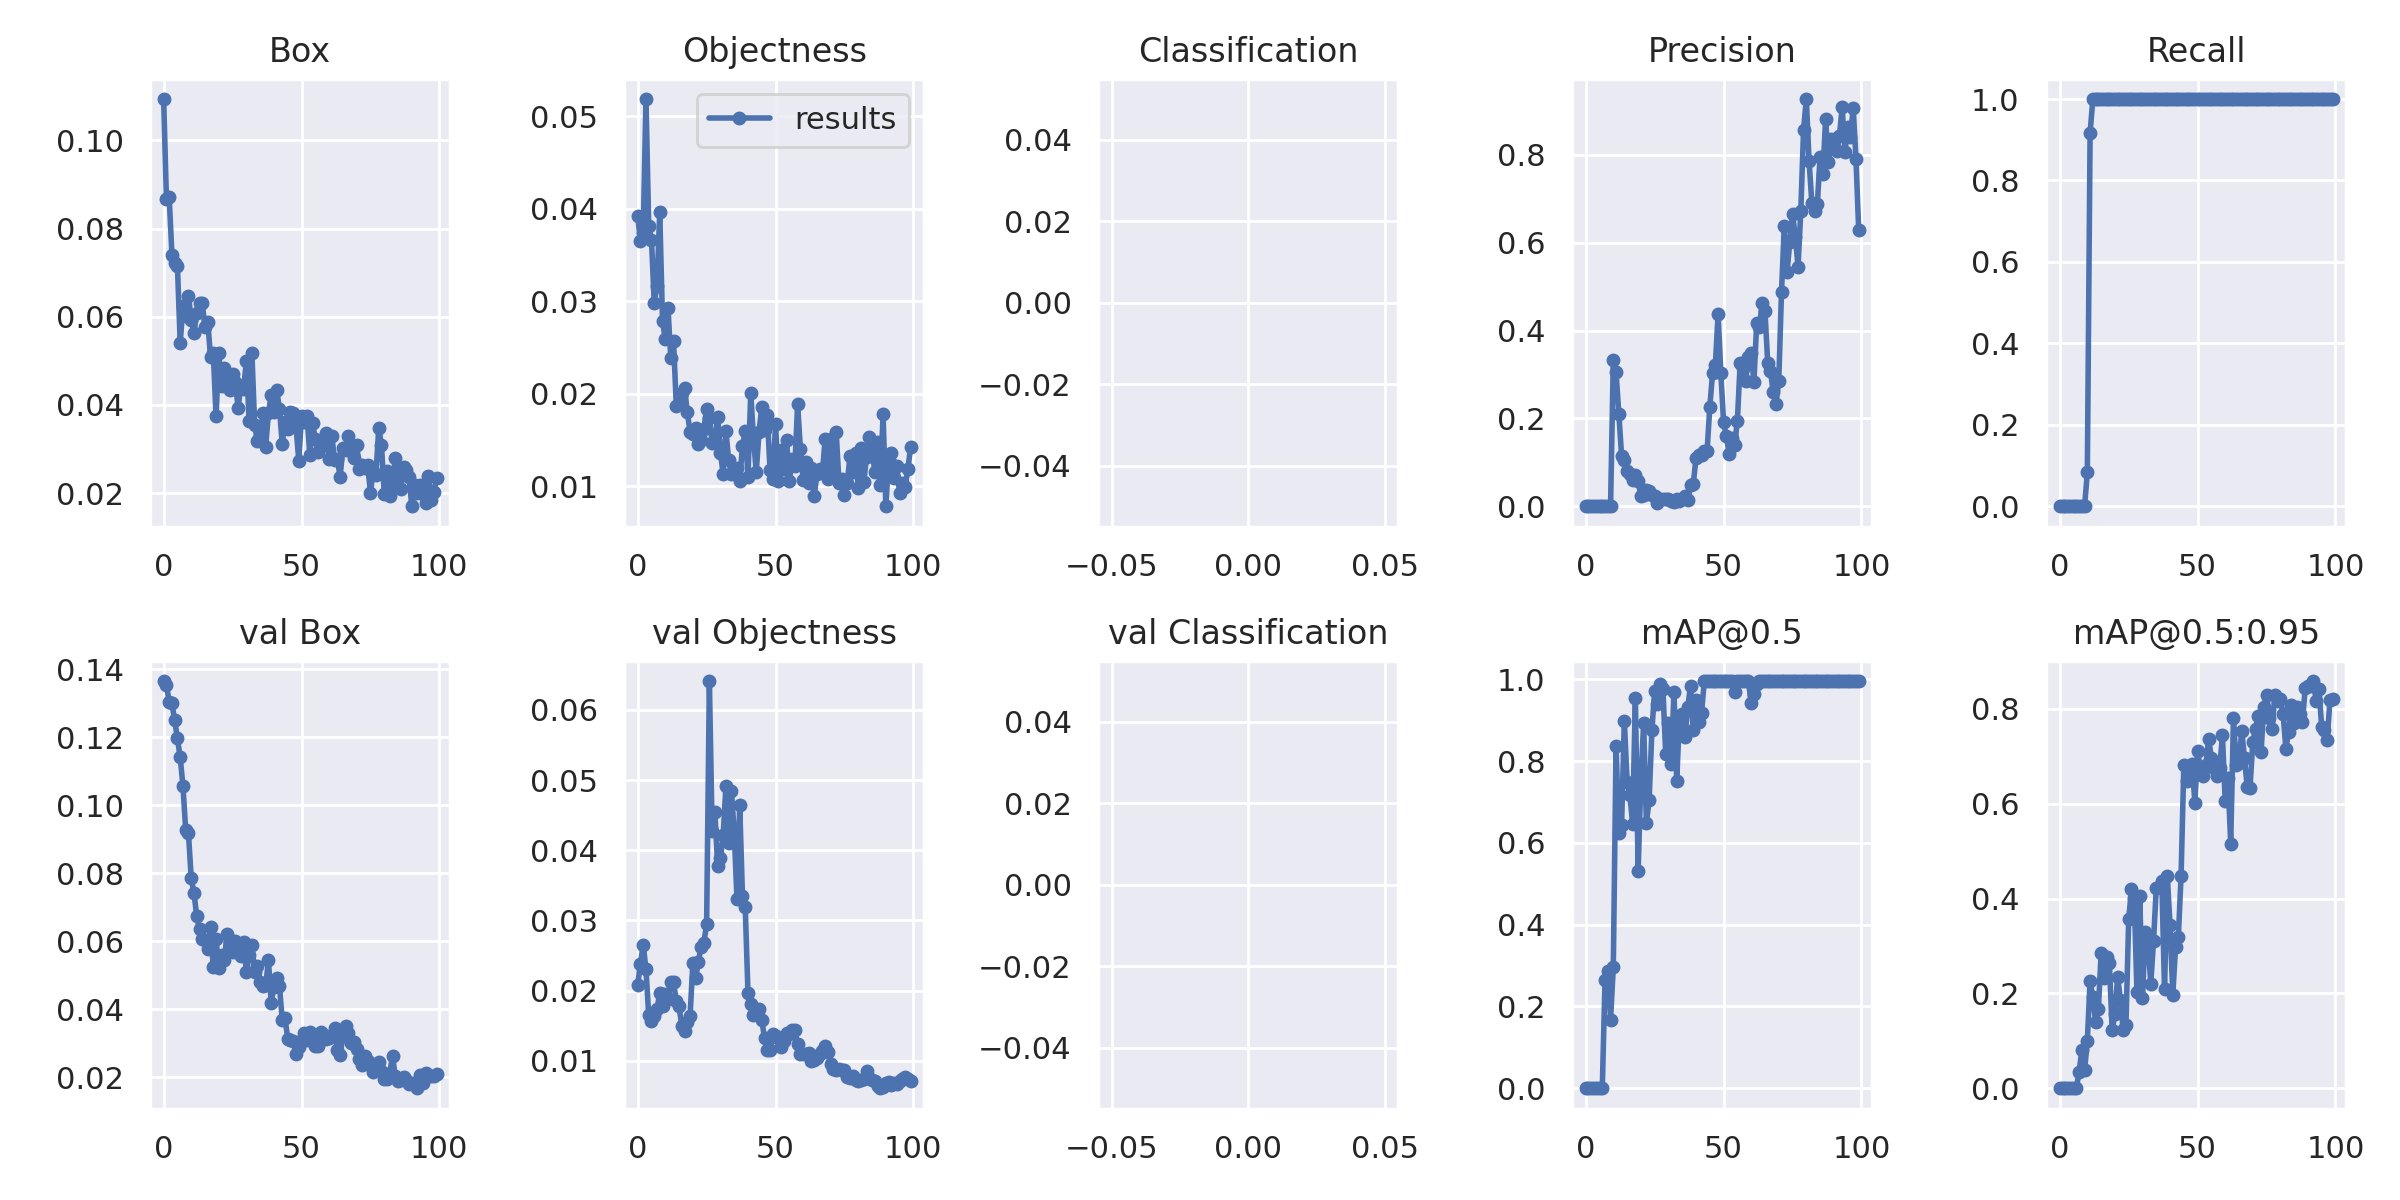

In [8]:
Image(filename='runs/train/trashy/results.png', width=800)